# Example for utilization of QSP to control randomized $z$-rotations

## Packages

In [1]:
] activate .

  Activating project at `~/GitHub/Master-Thesis-Random-Qubit-Rotations-Results/code`


In [2]:
] add https://github.com/Fhoeddinghaus/CoordinateSystems.jl.git

    Updating git-repo `https://github.com/Fhoeddinghaus/CoordinateSystems.jl.git`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/GitHub/Master-Thesis-Random-Qubit-Rotations-Results/code/Project.toml`
  [d6291028] ~ CoordinateSystems v0.1.0 `https://github.com/Fhoeddinghaus/CoordinateSystems.jl.git#main` ⇒ v0.1.0 `https://github.com/Fhoeddinghaus/CoordinateSystems.jl.git#main`
    Updating `~/GitHub/Master-Thesis-Random-Qubit-Rotations-Results/code/Manifest.toml`
  [d6291028] ~ CoordinateSystems v0.1.0 `https://github.com/Fhoeddinghaus/CoordinateSystems.jl.git#main` ⇒ v0.1.0 `https://github.com/Fhoeddinghaus/CoordinateSystems.jl.git#main`
Precompiling project...
   7987.6 ms  ✓ BlochSphereBigFloat
  1 dependency successfully precompiled in 10 seconds. 304 already precompiled.


In [3]:
] add https://github.com/Fhoeddinghaus/BlochSphereBigFloat.jl.git

    Updating git-repo `https://github.com/Fhoeddinghaus/BlochSphereBigFloat.jl.git`
   Resolving package versions...
    Updating `~/GitHub/Master-Thesis-Random-Qubit-Rotations-Results/code/Project.toml`
  [cc0cc715] ~ BlochSphereBigFloat v0.1.1 `https://github.com/Fhoeddinghaus/BlochSphereBigFloat.jl.git#main` ⇒ v0.1.1 `https://github.com/Fhoeddinghaus/BlochSphereBigFloat.jl.git#main`
    Updating `~/GitHub/Master-Thesis-Random-Qubit-Rotations-Results/code/Manifest.toml`
  [cc0cc715] ~ BlochSphereBigFloat v0.1.1 `https://github.com/Fhoeddinghaus/BlochSphereBigFloat.jl.git#main` ⇒ v0.1.1 `https://github.com/Fhoeddinghaus/BlochSphereBigFloat.jl.git#main`


In [4]:
using CoordinateSystems
using BlochSphereBigFloat
using BlochSphereBigFloat.PulseSequenceRandomizedRotations

In [5]:
using LinearAlgebra
using Base.Threads
using ThreadsX
using LsqFit
using SparseArrays
using Statistics
import Plots
using LaTeXStrings
using ProgressMeter
#using Distributions
#using ComplexBigMatrices
ProgressMeter.ijulia_behavior(:clear)

false

In [6]:
using Polynomials
using ToeplitzMatrices
include("angle-sequence.jl")

angseq (generic function with 1 method)

In [7]:
include("pulse-sequence-visualization.jl")

visualize_pulse_sequence! (generic function with 2 methods)

In [8]:
include("PulseSequenceSimulatedAnnealing.jl")

simulate_annealing_min_variable_T (generic function with 1 method)

In [9]:
#run(`pdftocairo -png -r 600 -singlefile images/SO3/$fn.pdf thesis-overleaf/bilder/SO3/$fn`)
function pdf2png(fn)
    run(`pdftocairo -png -r 600 -singlefile $fn.pdf $fn`)
end

pdf2png (generic function with 1 method)

## Example

In [10]:
# Constant:
#target_func(x) = 1 # not possible
#target_func(x) = (abs(x) < 0.5 ? 0.5 : (x < 0 ? 0 : 1))
#target_func(x) = (x < 0 ? x/2 + 1 : x/2)
#target_func(x) = (abs(x) > 0.2 ? 0.5 : (x > 0 ? 1 : 0))


# Step function
target_func(x) = (x < 0 ? 0 : 1)

target_func (generic function with 1 method)

In [65]:
d = 12
absλ_fac = 0.5
#convergent_limit_bound = 4d, (2d)^2

0.5

In [66]:
function model(xs, λs; d=d)
    # add odd coefficients (all zero)
    λs = vcat([[0, λ] for λ in λs]...)
    # construct hermitian coefficients, and fixate λ_0 = 1/2
    λs = vcat(-reverse(λs)*im, [0.5], λs*im)
    L = LaurentPolynomial(λs, -2d) 
    return real(L.(cis.(acos.(xs)))) 
end

model (generic function with 1 method)

In [67]:
function laurent_norm(p::LaurentPolynomial; N::Int=500, idx=false)
    #TT = cispi.(2 * (0:N-1) ./ N)
    TT = cispi.((0:N-1) ./ N)
    if idx
        m, i = findmax(abs.(p.(TT)))
        return m, TT[i]
    else
        return maximum(abs.(p.(TT)))
    end
end

laurent_norm (generic function with 1 method)

###### Fit:

In [68]:
xs = -1:0.001:1
ys = target_func.(xs)

# random start parameters and fit
λs = -rand(d)
fit = curve_fit(model, xs, ys, λs)
λs = fit.param

λs_ = vcat([[0, λ] for λ in λs]...) 
# for rescaling-norm w/o 0.5:
λs_ = vcat(-reverse(λs_)*im, [0.], λs_*im)
L = LaurentPolynomial(λs_, -2d) 
l = max(laurent_norm(L), absλ_fac)

# rescaling
λs = λs .* (absλ_fac/l)
λs = vcat([[0, λ] for λ in λs]...) 
λs = vcat(-reverse(λs)*im, [0.5], λs*im) 

# final Laurent polynomial
Ω² = LaurentPolynomial(λs, -2d)

LaurentPolynomial(-0.011681979198827328im*x⁻²⁴ + 0.015459802050703774im*x⁻²² - 0.007488695664592438im*x⁻²⁰ + 0.023636047651941754im*x⁻¹⁸ - 0.005374774763198958im*x⁻¹⁶ + 0.033979668045216946im*x⁻¹⁴ - 0.0037961406436563777im*x⁻¹² + 0.050834688398009im*x⁻¹⁰ - 0.002443588707564556im*x⁻⁸ + 0.08808081459219037im*x⁻⁶ - 0.0011991709207018653im*x⁻⁴ + 0.2690836589141365im*x⁻² + 0.5 - 0.2690836589141365im*x² + 0.0011991709207018653im*x⁴ - 0.08808081459219037im*x⁶ + 0.002443588707564556im*x⁸ - 0.050834688398009im*x¹⁰ + 0.0037961406436563777im*x¹² - 0.033979668045216946im*x¹⁴ + 0.005374774763198958im*x¹⁶ - 0.023636047651941754im*x¹⁸ + 0.007488695664592438im*x²⁰ - 0.015459802050703774im*x²² + 0.011681979198827328im*x²⁴)

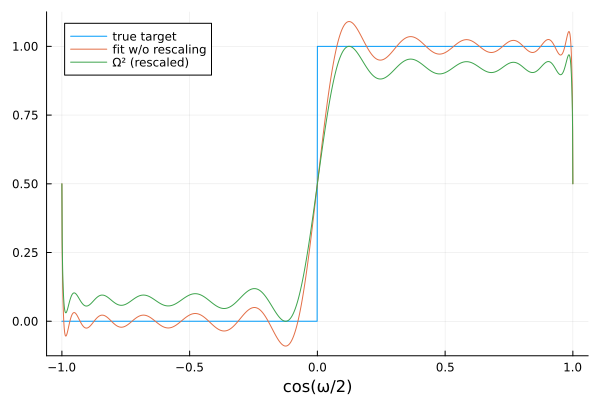

In [69]:
# show fit:
Plots.plot((xs), target_func.(xs), label="true target", xlabel="cos(ω/2)")
Plots.plot!((xs), real((L+0.5).(cis.(acos.(xs)))), label="fit w/o rescaling")
Plots.plot!((xs), real(Ω².(cis.(acos.(xs)))), label="Ω² (rescaled)")


#Plots.plot!(xs, imag(Ω².(cis.(acos.(xs)))), label="Ω²") # is zero

###### Factorization by Cholesky decompositon:

In [70]:
convergent_limit_bound = 4d #(2d)^2
rs = zeros(ComplexF64, 2d+1)
println("convergent_limit_bound = ", convergent_limit_bound)

# construct Toeplitz from λs
el = eltype(λs)
G = el[(abs(i-j) <= 2d ? λs[2d+1+i-j] : 0) for i in 0:convergent_limit_bound, j in 0:convergent_limit_bound]
# apply 'infinite' (w/ converging limit) cholesky decomposition
try
    C = cholesky(sparse(G), perm=1:size(G,1)) 
    R = Matrix(sparse(C.L)) 
    for i in 0:2d
        rs[i+1] = diag(R, -i)[end]
    end
catch e
    @warn sprint(showerror, e)
end

# small correction:
rs *= sqrt(0.5/sum(abs2.(rs))) # unitarity condition
;

convergent_limit_bound = 48


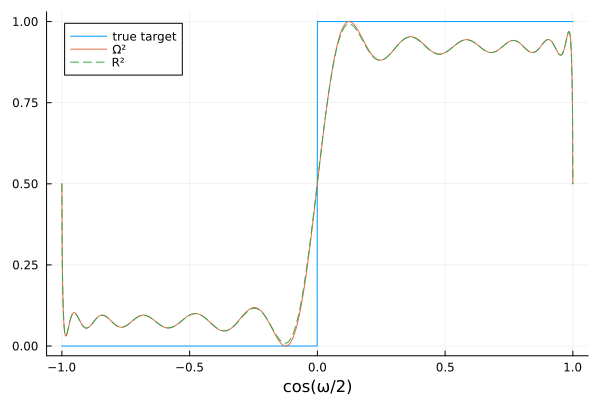

In [71]:
Rw = LaurentPolynomial(rs, -d)
Rcw⁻¹ = LaurentPolynomial(conj(reverse(Rw.coeffs)), -d)
RR = Rw * Rcw⁻¹

# check if RR ≈ Ω²
Plots.plot(xs, target_func, label="true target", xlabel="cos(ω/2)")
Plots.plot!(xs, real(Ω².(cis.(acos.(xs)))), label="Ω²")
Plots.plot!(xs, real(RR.(cis.(acos.(xs)))), label="R²", ls=:dash)

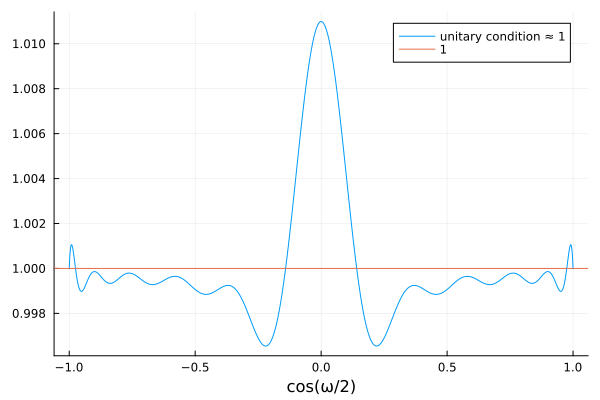

In [72]:
# check (approximated) unitarity:
Rcw = LaurentPolynomial(conj(Rw.coeffs), -d)
Rw⁻¹ = LaurentPolynomial(reverse(Rw.coeffs), -d)

Unitary = RR + Rcw * Rw⁻¹ # ≈ 1

Plots.plot(xs, real(Unitary.(cis.(acos.(xs)))), label="unitary condition ≈ 1", xlabel="cos(ω/2)")
Plots.hline!([1], label="1")

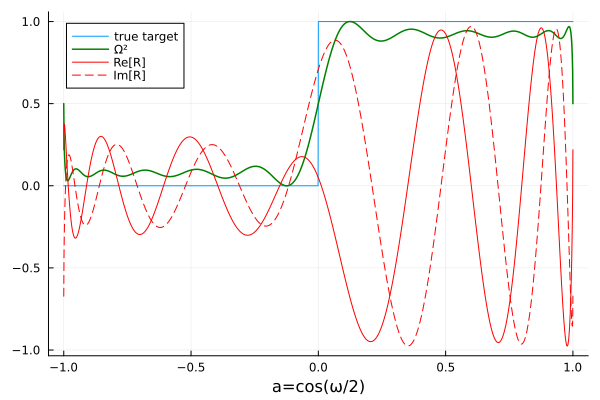

In [73]:
Plots.plot(xs, target_func, label="true target", xlabel="a=cos(ω/2)")
Plots.plot!(xs, real(Ω².(cis.(acos.(xs)))), label="Ω²", c=:green, lw=1.5)
Plots.plot!(xs, real(Rw.(cis.(acos.(xs)))), label="Re[R]", c=:red)
Plots.plot!(xs, imag(Rw.(cis.(acos.(xs)))), label="Im[R]", c=:red, ls=:dash)

#Plots.savefig("../figures/qsp-fit-d$d-R.pdf")

Plots.plot!()

###### Decompositon for $(W_z, S_x, \langle{0}|\cdot|{0}\rangle)$-convention

In [74]:
fs = sqrt(2) * real.(rs)
gs = sqrt(2) * imag.(rs)

F = LaurentPolynomial(fs, -d)
G = LaurentPolynomial(gs, -d)

#Plots.plot(xs, target_func, label="true target", xlabel="cos(ω/2)")
#Plots.plot!(xs, real(Ω².(cis.(acos.(xs)))), label="Ω²")
#Plots.plot!(xs, real(RR.(cis.(acos.(xs)))), label="R²", ls=:dash)

#Plots.plot!(-1:0.01:1, x->real(F(cis(acos(x)))), label="Re[F]", c=1)
#=
Plots.plot(-1:0.01:1, x->real(F(cis(acos(x)))), label="Re[F]", c=1)
Plots.plot!(-1:0.01:1, x->imag(F(cis(acos(x)))), label="Im[F]", ls=:dash,c=1)
Plots.plot!(-1:0.01:1, x->real(G(cis(acos(x)))), label="Re[G]", c=2)
Plots.plot!(-1:0.01:1, x->imag(G(cis(acos(x)))), label="Im[G]",ls=:dash, c=2)
=#

LaurentPolynomial(-0.5880250236988823*x⁻¹⁰ - 0.007834044865205296*x⁻⁸ - 0.15253194517442747*x⁻⁶ - 0.006076541628981646*x⁻⁴ - 0.083868915230283*x⁻² - 0.002914144510651949 - 0.06055933072090029*x² + 0.0017185798834556357*x⁴ - 0.04984533082469061*x⁶ + 0.009762557313477386*x⁸ - 0.04215356672769881*x¹⁰ + 0.03144565013660537*x¹²)

###### angle extraction

In [75]:
#F is IPoly
#G is XPoly
phis = angseq(F, G)

13-element Vector{Float64}:
 -1.5282442973030819
 -0.05844540113592367
  0.02718654025227152
 -0.08675164593938756
  0.020562265066852214
 -0.11966215448092421
  0.015742785003360238
 -0.16773768854697524
  0.011763832954781783
 -0.27037878228694256
  0.006652254773958255
 -0.6780292665218699
  1.5700892415213106

###### verification

In [76]:
PI = big(π);

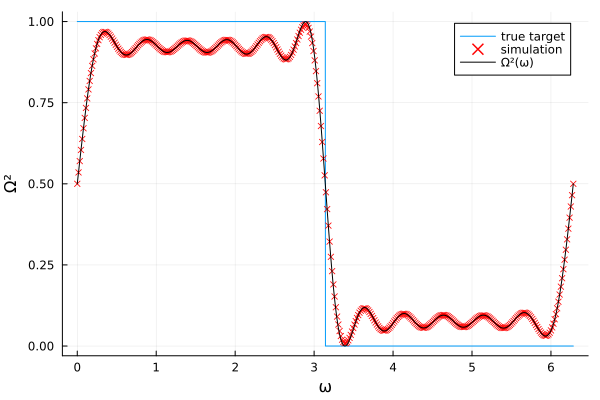

In [97]:
# factor -2 and reversed indexing:
pulses_x = -2 * reverse(phis)

# build full pulse sequence
tz = -1
seq = Tuple{Symbol, BigFloat}[(i % 2 == 0 ? (:x, pulses_x[div(i,2)]) : (:z, tz)) for i in 1:2*length(pulses_x)] 
seq[1] = (:z, 0) 
#seq[2] = (:x, 0) # is completely irrelevant!
seq = seq[3:end]

#@show seq
#@show length(seq)

ωs = range(0, 2PI, length=400)
#xs = -1:0.01:1
#ωs = big.(2 * acos.(xs))
#δ = big(1e-2)

function εs(ωs, pulses)
    return big(1.0) .- overlap_by_sequence_threaded(collect(ωs), pulses)
end

function O2(ωs, pulses)
    return overlap_by_sequence_threaded(collect(ωs), pulses)
end



O2_v = O2(ωs, seq)
#@show O2_mean = mean(O2_v)
Plots.plot(2*acos.(xs), target_func.(xs), label="true target", xlabel="a=cos($(tz == -1 ? "" : "t")ω/2)", ylabel="Ω²")
Plots.scatter!((ωs), O2_v, marker=3, label="simulation", c=:red, markershape=:x)
Plots.plot!(ωs, real(Ω².(cis.(-tz*ωs/2))), label="Ω²(ω)", lw=1, c=:black)
display(Plots.plot!(ylabel="Ω²", xlabel="ω")) 

#Plots.savefig("../figures/qsp-sim-d$d-omega.pdf")

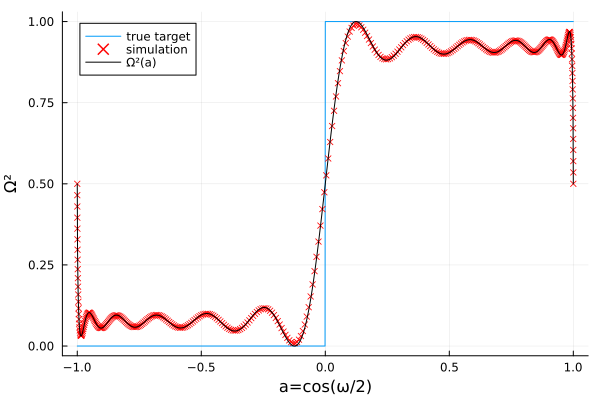

In [98]:
Plots.plot(xs, target_func, label="true target", xlabel="a=cos($(tz == -1 ? "" : "t")ω/2)", ylabel="Ω²")

Plots.scatter!(cos.(tz*ωs/2), O2_v, marker=3, label="simulation", c=:red, markershape=:x)

Plots.plot!(xs, real(Ω².(cis.(acos.(xs)))), label="Ω²(a)", lw=1, c=:black)

#Plots.savefig("../figures/qsp-sim-d$d.pdf")

Plots.plot!()

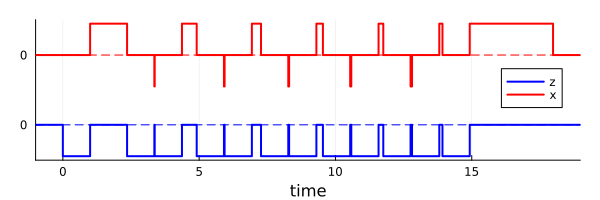

In [99]:
visualize_pulse_sequence(seq)
#Plots.plot!(size=(800,200), legendposition=:right, margin=4Plots.mm)
Plots.plot!(legendposition=:right)
#Plots.savefig("../figures/qsp-pulse-sequence-d$d.pdf")

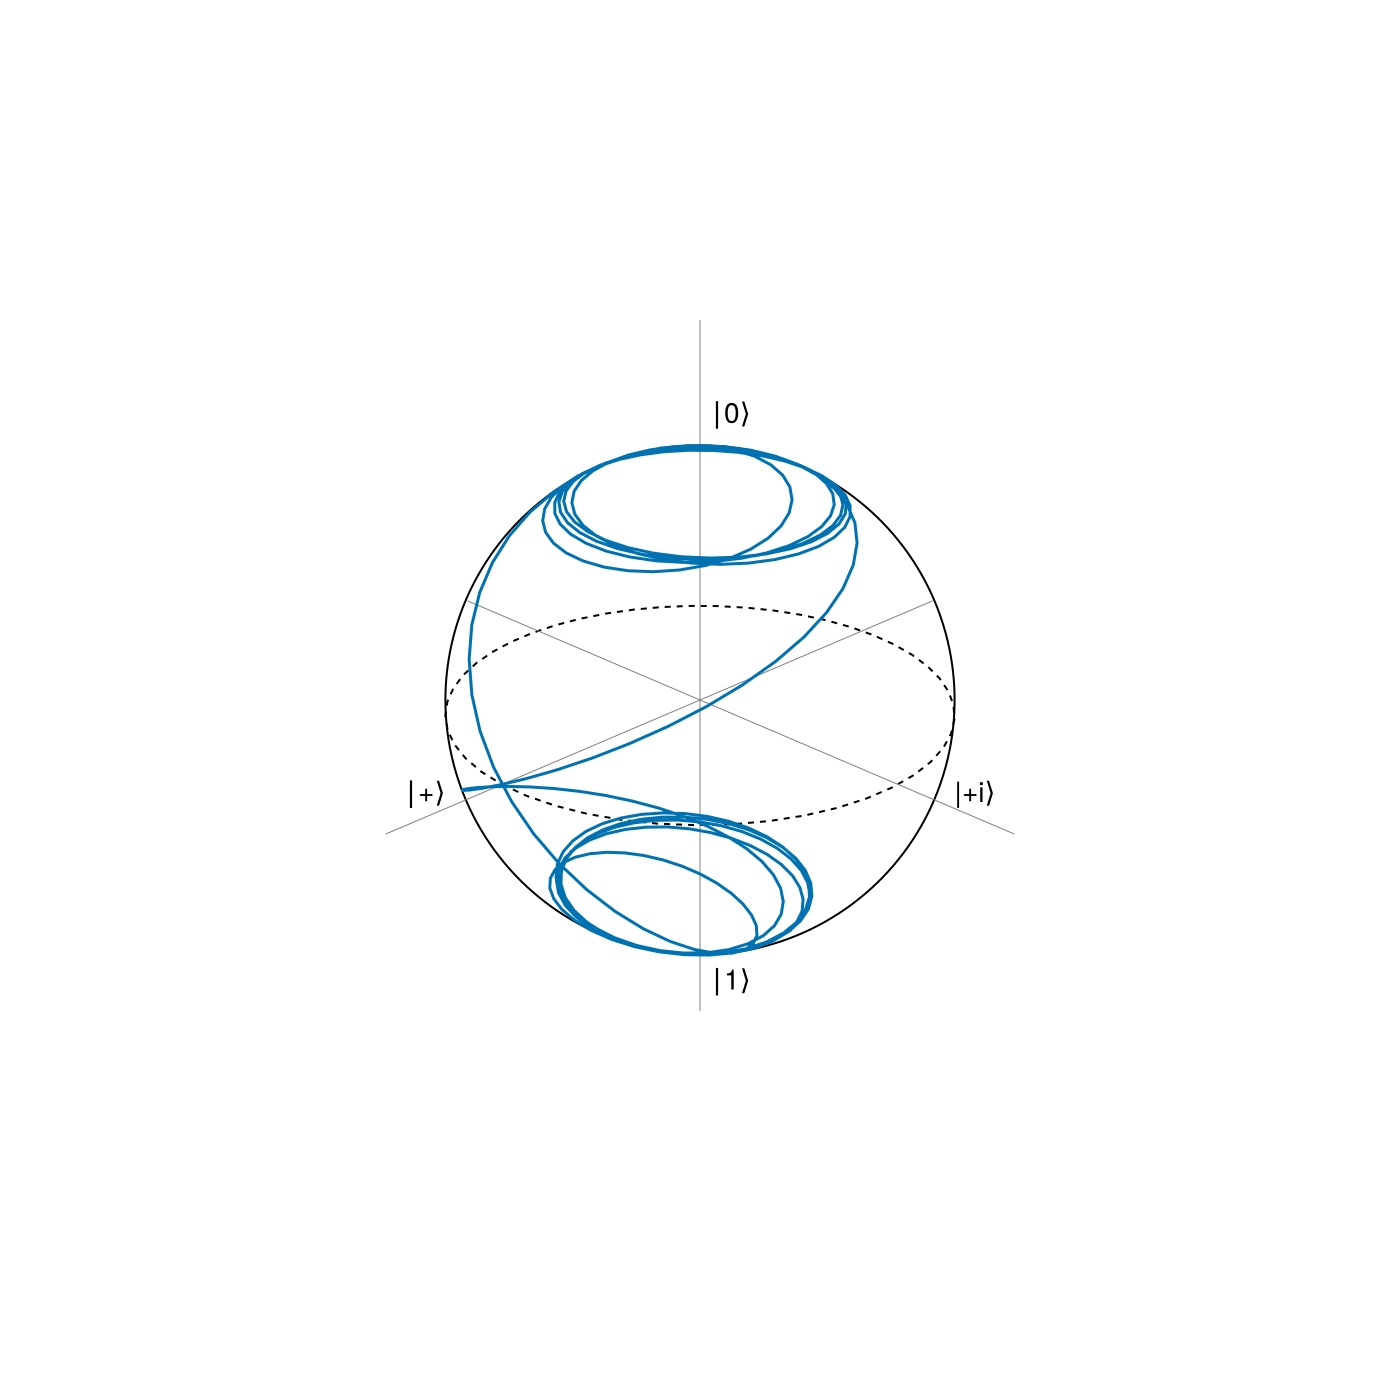

In [100]:
let
    ωs = collect(range(0, 2PI, length=400))
    fig, ax = setup_blochplot(outlines_only=true, show_axis=false, size=(700,700))

    s = states_by_sequence_threaded(ωs, seq)
    
    #pBloch(ax, s, false, colorrange=(1,400), color=1:400, colormap=:reds)
    pBloch(ax, s, false)
    
    #Colorbar(fig[1,2], limits=(0,2PI), ticks=([i*π for i in 0:0.5:2], ["$(i)π" for i in 0:0.5:2]), colormap=:reds)
    
    #save("../figures/qsp-sim-d$d-bloch.pdf", fig)
    #pdf2png("../figures/qsp-sim-d$d-bloch")
    
    fig
end

###### rescaling $\omega$:

seq = Tuple{Symbol, BigFloat}[(:z, -0.5), (:x, 1.356058533043739799950344604440033435821533203125), (:z, -0.5), (:x, -0.0133045095479165098595331073738634586334228515625), (:z, -0.5), (:x, 0.540757564573885129988184417015872895717620849609375), (:z, -0.5), (:x, -0.0235276659095635665153167792595922946929931640625), (:z, -0.5), (:x, 0.33547537709395047755833729752339422702789306640625), (:z, -0.5), (:x, -0.031485570006720475788597468635998666286468505859375), (:z, -0.5), (:x, 0.239324308961848419841089707915671169757843017578125), (:z, -0.5), (:x, -0.041124530133704428891405768808908760547637939453125), (:z, -0.5), (:x, 0.173503291878775112166977123706601560115814208984375), (:z, -0.5), (:x, -0.054373080504543036539644162985496222972869873046875), (:z, -0.5), (:x, 0.116890802271847338289489925955422222614288330078125), (:z, -0.5), (:x, 3.056488594606163733402581783593632280826568603515625)]


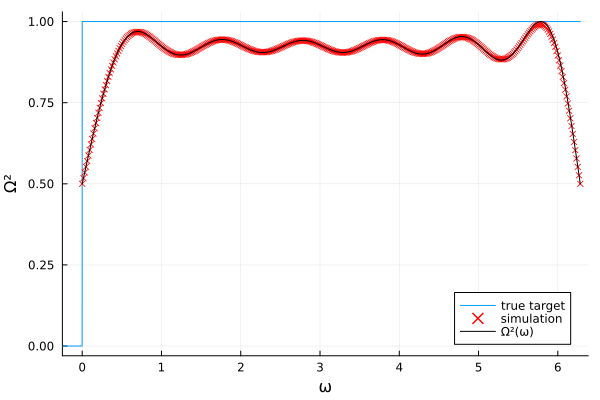

In [108]:
# factor -2 and reversed indexing:
pulses_x = -2 * reverse(phis)

# build full pulse sequence
tz = -1/2
seq = Tuple{Symbol, BigFloat}[(i % 2 == 0 ? (:x, pulses_x[div(i,2)]) : (:z, tz)) for i in 1:2*length(pulses_x)] 
seq[1] = (:z, 0) 
#seq[2] = (:x, 0) # is completely irrelevant!
seq = seq[3:end]

@show seq
#@show length(seq)

ωs = range(0, 2PI, length=400)
#δ = big(1e-2)

function εs(ωs, pulses)
    return big(1.0) .- overlap_by_sequence_threaded(collect(ωs), pulses)
end

function O2(ωs, pulses)
    return overlap_by_sequence_threaded(collect(ωs), pulses)
end



O2_v = O2(ωs, seq)
#@show O2_mean = mean(O2_v)
Plots.plot(-0.5:0.001:2PI, target_func, label="true target", xlims=(-0.25, 2PI+0.1))
Plots.scatter!((ωs), O2_v, marker=3, label="simulation", c=:red, markershape=:x)
Plots.plot!(ωs, real(Ω².(cis.(-tz*ωs/2))), label="Ω²(ω)", lw=1, c=:black) 
display(Plots.plot!(xlabel="ω", ylabel="Ω²")) 

#Plots.savefig("../figures/qsp-sim-d$d-t-rescaled-omega.pdf")


#Plots.plot(cos.(tz*ωs/2), O2_v, marker=3, ylabel="O²", xlabel="a=cos($(tz == -1 ? "" : "t")ω/2)", label="O²")
#Plots.plot!()

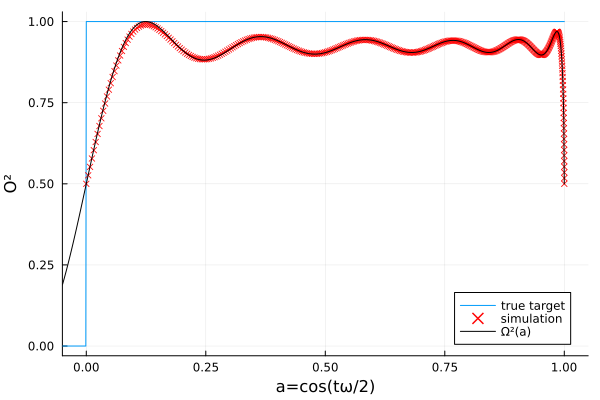

In [102]:
Plots.plot(xs, target_func, label="true target", xlabel="a=cos($(tz == -1 ? "" : "t")ω/2)")
#Plots.plot!(xs, real((L+0.5).(cis.(acos.(xs)))), label="fit w/o rescaling")

Plots.scatter!(cos.(tz*ωs/2), O2_v, marker=3, ylabel="O²", label="simulation", c=:red, markershape=:x)
#Plots.scatter!(ωs, O2_v, marker=3, ylabel="O²", label="simulation", c=:red, markershape=:x)

Plots.plot!(xs, real(Ω².(cis.(acos.(xs)))), label="Ω²(a)", lw=1, c=:black, xlims=(-0.05,1.05)) 

##Plots.savefig("../figures/qsp-sim-d$d-t-rescaled.pdf")

Plots.plot!()

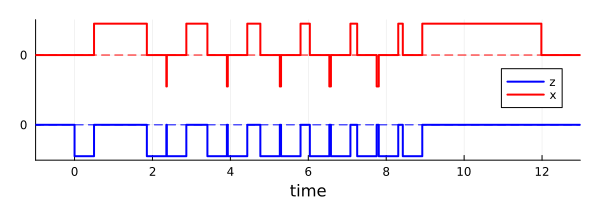

In [103]:
visualize_pulse_sequence(seq)
#Plots.plot!(size=(800,200), legendposition=:right, margin=4Plots.mm)
Plots.plot!(legendposition=:right)
#Plots.savefig("../figures/qsp-pulse-sequence-d$d-t-rescaled.pdf")

In [55]:
using BlochSphereBigFloat.Makie

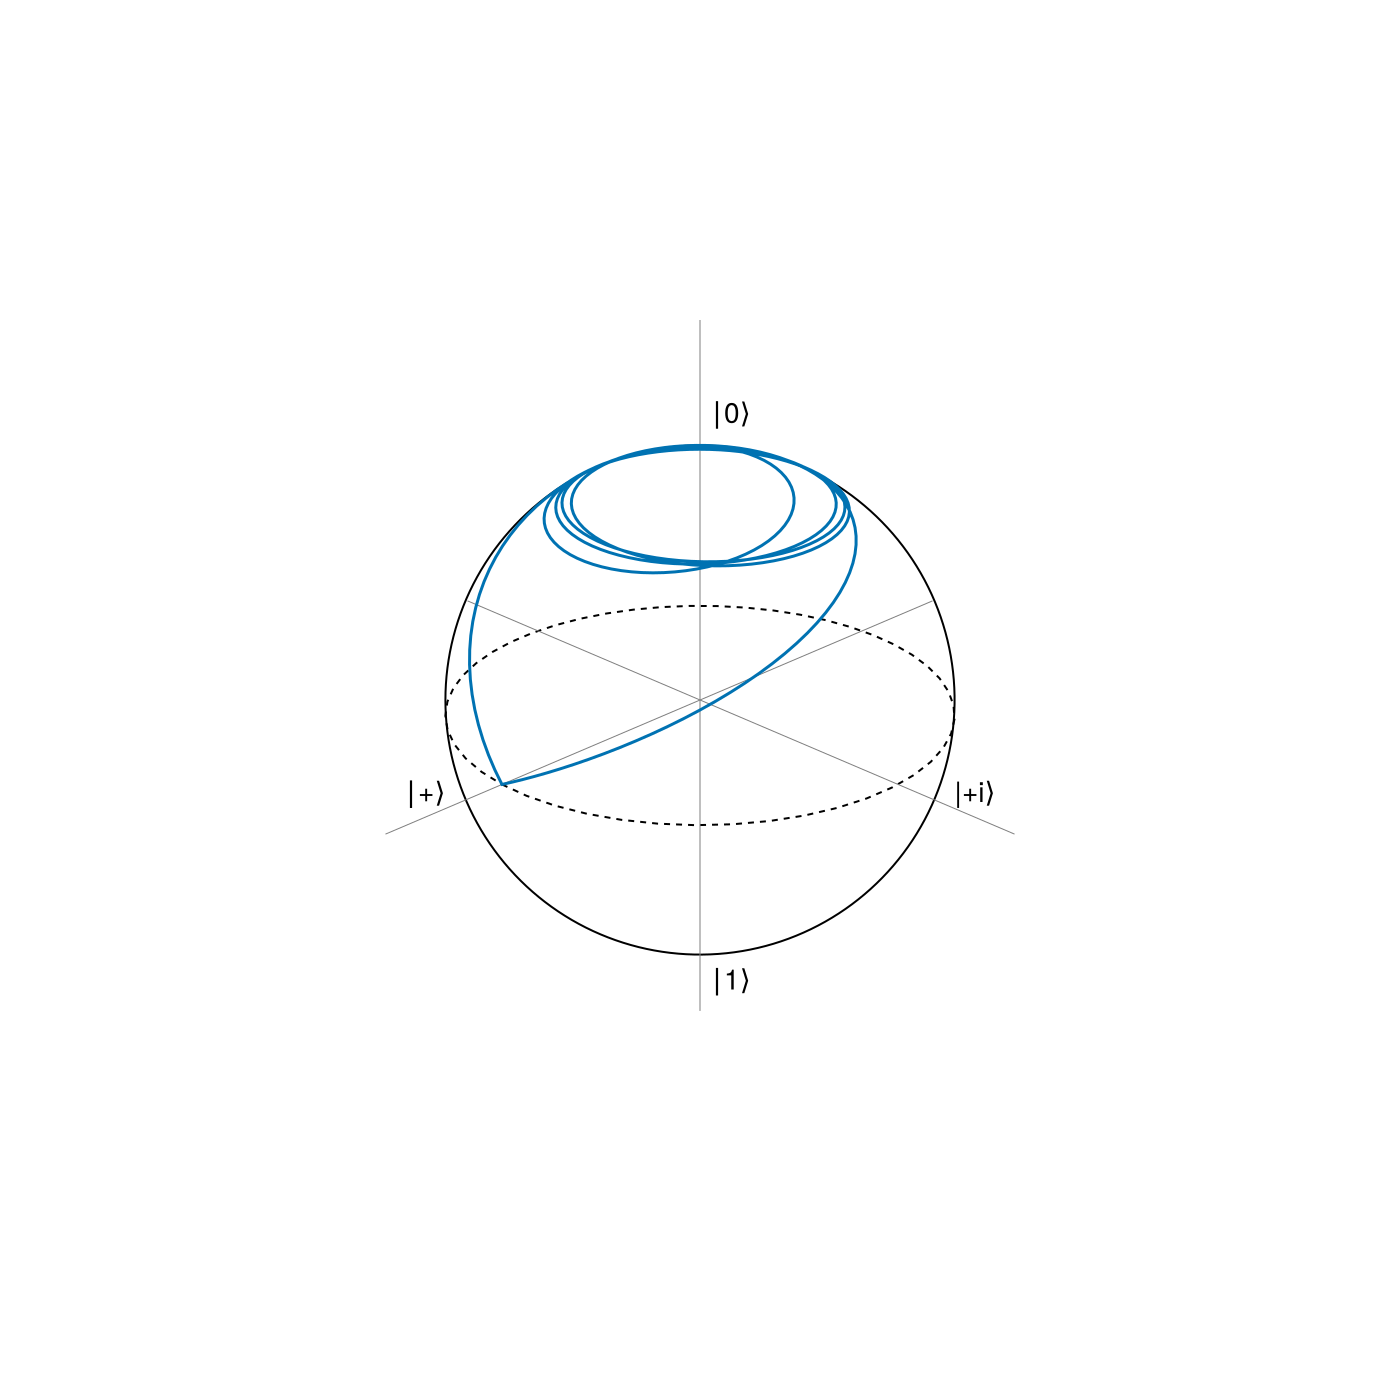

In [56]:
let
    ωs = collect(range(0, 2PI, length=400))
    fig, ax = setup_blochplot(outlines_only=true, show_axis=false, size=(700,700))
    s = states_by_sequence_threaded(ωs, seq)
    
    pBloch(ax, s, false)
    
    #save("../figures/qsp-sim-d$d-bloch-t-rescaled.pdf", fig)
    #pdf2png("../figures/qsp-sim-d$d-bloch-t-rescaled")
    
    fig
end

In [57]:
function f_opt(ωs, pulses)
    return big(1.0) - mean(overlap_by_sequence_threaded(ωs, pulses))
    #return big(1.0) - mean(overlap_by_sequence(ωs, pulses)) 
end

function f_opt_single(ωs, pulses)
    return big(1.0) .- overlap_by_sequence_threaded(ωs, pulses)
end


function initial_vals(num_layers::Int64)
    #return BigFloat[(isodd(i) ? (2*rand(BigFloat)-1)*π : rand([-1, +1]) * π/2) for i in 1:(2num_layers)] #ones(BigFloat, 2*num_layers)
    return BigFloat[rand([-1, +1]) * π/2 * (mod1(i,2)) for i in 1:(2num_layers)] #ones(BigFloat, 2*num_layers)
end

initial_vals (generic function with 1 method)

###### optimizing z-pulses w/ fixed x-pulses from qsp // optimizing x-pulses w/ fixed z-pulses // optimizing all pulses

Simulating... 100%|████████████████████████| Time: 0:01:15 ( 0.75  s/it)
    iter: 65
       T: 3.898603702549071801391715493264738094918894356799039113656114807402767353401944e-05
    fval: 0.04277023627107054031841549764325986308950398487242304323295282730573249292870663
   order: -1.37


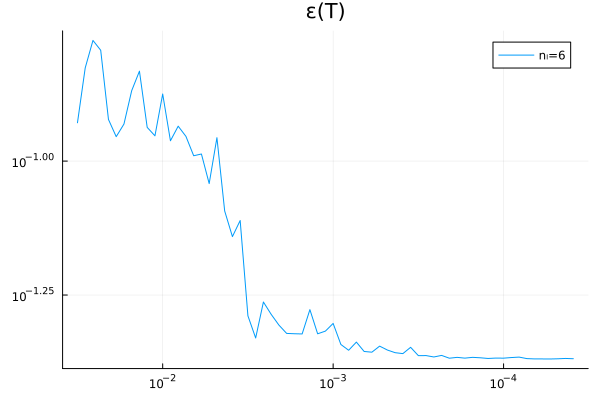

f_opt = 0.1138745181772530446616972078386917680232203803530448282066422574477766913674958
ωs_opt = BigFloat[0.5, 1.016653209743598770124924694857565733297834587117828189040899016783239346597495, 1.533306419487197540249849389715131466595669174235656378081798033566478693194991, 2.049959629230796310374774084572697199893503761353484567122697050349718039792469, 2.566612838974395080499698779430262933191338348471312756163596067132957386389981, 3.083266048717993850624623474287828666489172935589140945204495083916196732987459, 3.599919258461592620749548169145394399787007522706969134245394100699436079584937, 4.116572468205191390874472864002960133084842109824797323286293117482675426182415, 4.633225677948790160999397558860525866382676696942625512327192134265914772779962, 5.149878887692388931124322253718091599680511284060453701368091151049154119377371, 5.666532097435987701249246948575657332978345871178281890408990167832393465974918, 6.18318530717958647137417164343322306627618045829611007944988918461

In [194]:
# n=12
#let
println(d)
num_layers = d
num_ωs_opt = 2d
ωs_opt = collect(range(big(.5), 2PI-0.1, num_ωs_opt)) 

#optimization
begin
    sweepsize = 500
    max_order_diff = 3
    max_order = 3 #9
    max_iter = 100
    #Ts = 1 ./ BigFloat[big(10.0)^i for i in 1.5:0.1:(max_order_diff+max_order)]
    Ts = 1 ./ BigFloat[big(10.0)^i for i in range(1.5, max_order_diff+max_order, max_iter)]
    stepsize(i,T, fv_last) = sqrt(fv_last*2)

    #start_seq = vals2sequence(vals) 
    #start_seq[1:2:end] .= (:z, big(-1.))
    start_seq = copy(seq)

    # what will be changed: :z, :x, :both or subset of {1,...,2d}
    opt_change = :z
    if opt_change == :z
        idx = 1:2:2d
    elseif opt_change == :x
        idx = 2:2:2d
    elseif opt_change == :both
        idx = false
    elseif opt_change == :noqsp
        println("No qsp...")
        idx = false
        start_seq = vals2sequence(initial_vals(num_layers)) 
    else
        println("Using custom indices...")
        idx = opt_change
    end

    Fs, seq_new, steps = simulate_annealing_min(
        f_opt, 
        Ts, 
        ωs_opt, 
        start_seq, 
        sweepsize=sweepsize, 
        stepsize=stepsize,
        idx=idx,
        max_order_diff=max_order_diff,
        max_order=max_order)

    filter!(x->x != 0, Fs)
    Ts = Ts[1:(length(Fs)-1)]

    display(Plots.plot(Ts, Fs[2:end], title="ε(T)", xscale=:log10, xflip=true, yscale=:log10, label="nₗ=$num_layers")) 
    println("f_opt = ", f_opt(ωs_opt, seq)) 

    @show ωs_opt
    @show seq_new
end

#anim = animate_sequence_path(ωs, seq_new, 10, plot_trace=true, plot_arrow=true, fps=50)

#save("images/SO3/seq-$num_layers-deltas-mcmc.mp4", anim)

#anim
#end

;

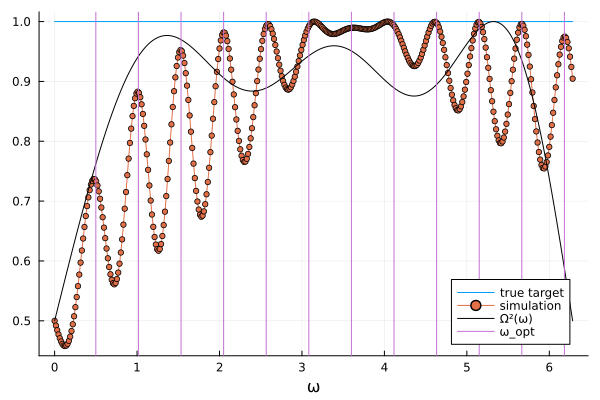

../figures/qsp-sim-opt-d6-z.pdf


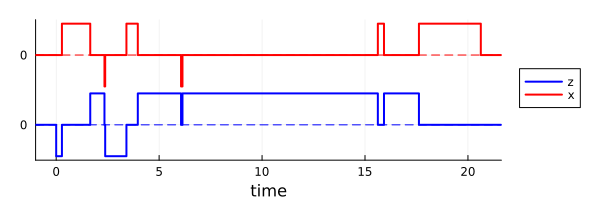

../figures/qsp-pulse-sequence-opt-d6-z.pdf
../figures/qsp-sim-opt-d6-bloch-z.pdf


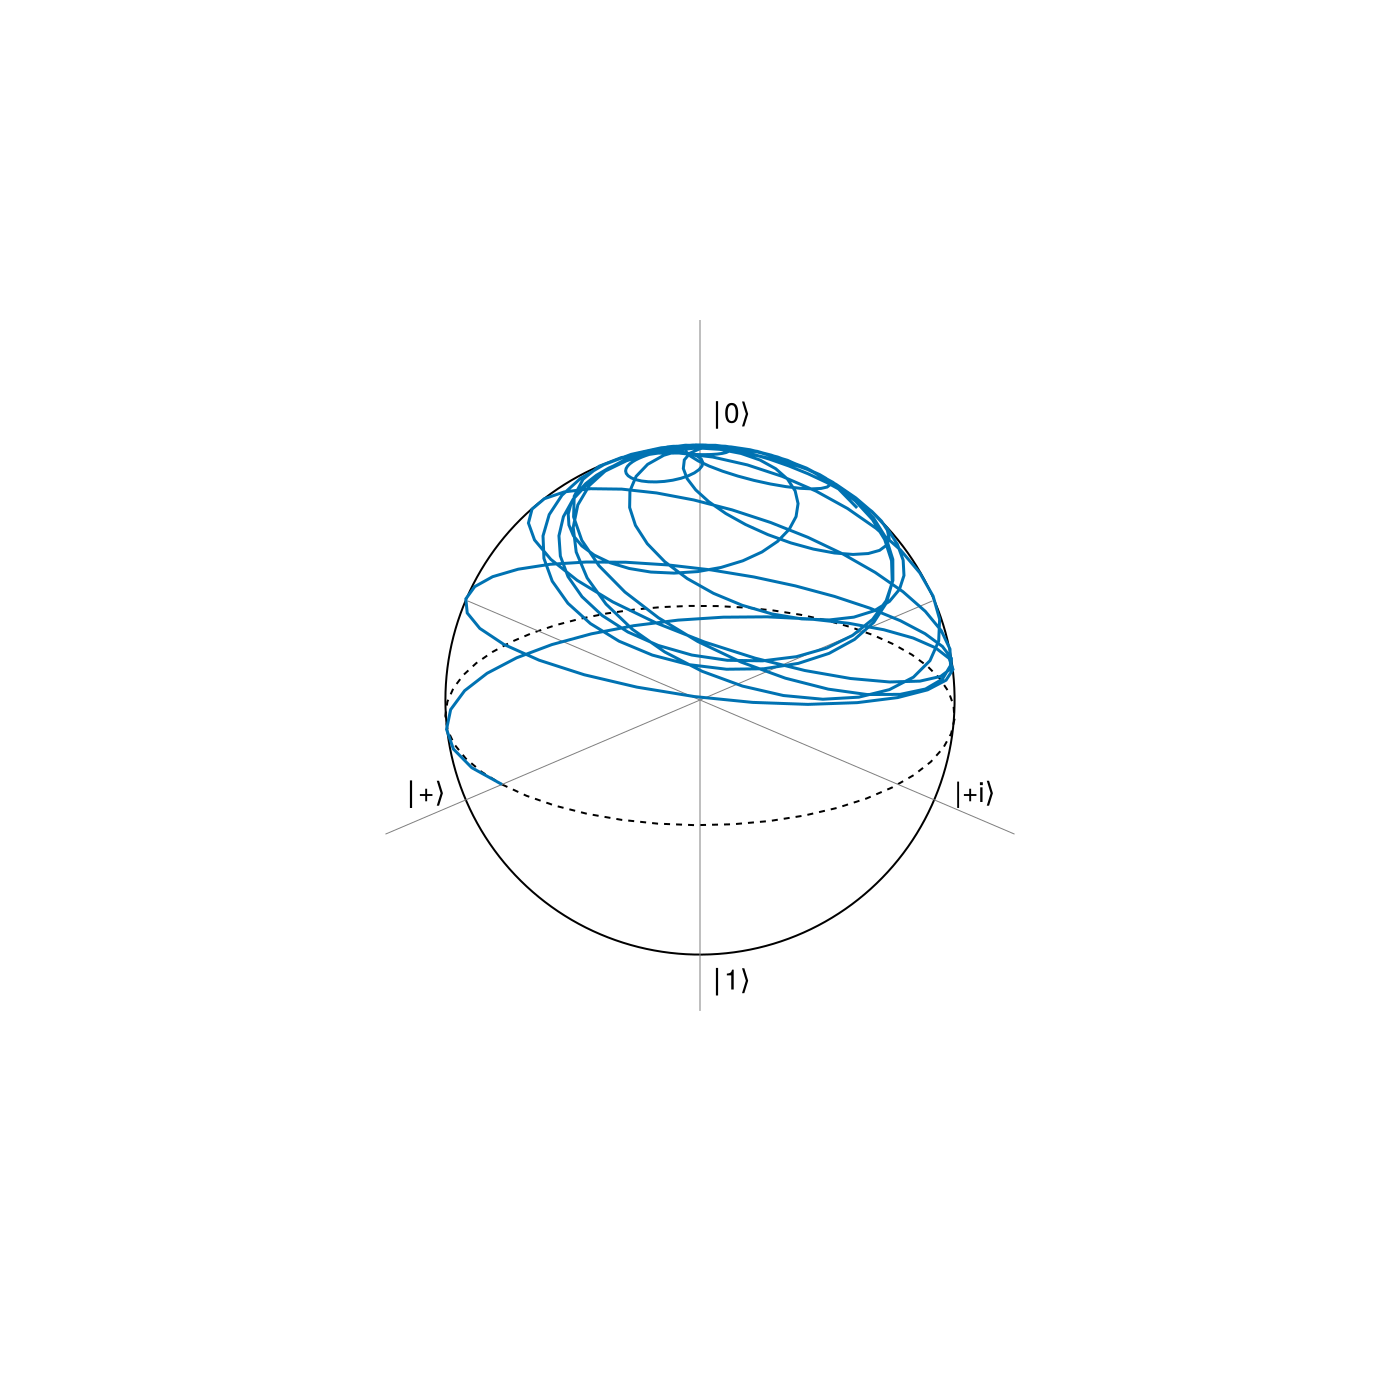

In [197]:
let
    svfig = false
    
    ωs = collect(range(0, 2PI, length=400))
    O2_v = O2(ωs, seq_new)
    #@show O2_mean = mean(O2_v)
    Plots.plot((ωs), target_func, label="true target")
    Plots.plot!((ωs), O2_v, marker=3, label="simulation")
    Plots.plot!((ωs), real(Ω².(cis.(-tz*ωs/2))), label="Ω²(ω)", lw=1, c=:black)
    Plots.vline!(ωs_opt, label="ω_opt")
    display(Plots.plot!(xlabel="ω")) 
    
    opt_change_ = replace(string(opt_change), ":" => "-")
    if svfig #|| true
        Plots.savefig("../figures/qsp-sim-opt-d$d-$opt_change_.pdf")
    end
    println("../figures/qsp-sim-opt-d$d-$opt_change_.pdf")
    
    
    display(visualize_pulse_sequence(seq_new)) 
    if svfig
        Plots.savefig("../figures/qsp-pulse-sequence-opt-d$d-$opt_change_.pdf")
    end
    println("../figures/qsp-pulse-sequence-opt-d$d-$opt_change_.pdf")
    
    
    fig, ax = setup_blochplot(outlines_only=true, show_axis=false, size=(700,700))
    s = states_by_sequence_threaded(ωs, seq_new)
    
    pBloch(ax, s, false)
    
    if svfig
        save("../figures/qsp-sim-opt-d$d-bloch-$opt_change_.pdf", fig)
        pdf2png("../figures/qsp-sim-opt-d$d-bloch-$opt_change_")
    end
    println("../figures/qsp-sim-opt-d$d-bloch-$opt_change_.pdf")

    
    fig
end

###### opt. harmonics

Simulating... 100%|████████████████████████| Time: 0:01:10 ( 0.47  s/it)
    iter: 64
       T: 1.149218701003699759143985884166047226176951132717818868278547384638235591332009e-06
    fval: 0.01304438544762381218331525846730843777760711687837023252769193751647033867321518
   order: -1.88


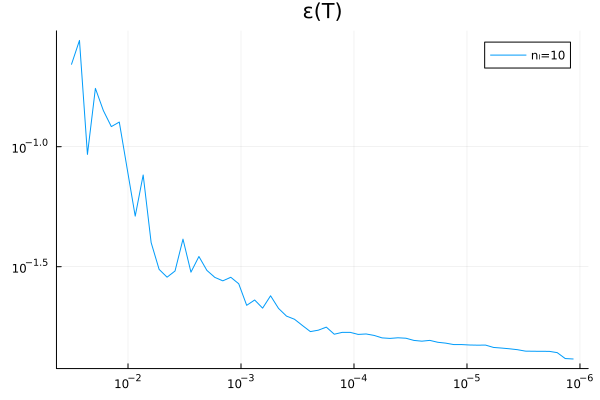

f_opt = 0.01304438544762381218331525846730843777760711687837023252769193751647033867321518
ωs_opt = BigFloat[0.6183185307179586471374171643433223066276180458296110079449889184615632812572362, 0.9274777960769379707061257465149834599414270687444165119174833776923449218858542, 1.236637061435917294274834328686644613255236091659222015889977836923126562514472, 1.545796326794896617843542910858305766569045114574027519862472296153908203143099, 1.854955592153875941412251493029966919882854137488833023834966755384689843771708, 2.164114857512855264980960075201628073196663160403638527807461214615471484400318, 2.473274122871834588549668657373289226510472183318444031779955673846253125028945, 2.782433388230813912118377239544950379824281206233249535752450133077034765657571, 3.091592653589793235687085821716611533138090229148055039724944592307816406286198, 3.40075191894877255925579440388827268645189925206286054369743905153859804691479, 3.70991118430775188282450298605993383976570827497766604766993351076937

In [60]:
# n=d
#let
println(d)
num_layers = d
num_ωs_opt = 2d
#ωs_opt = collect(range(big(.5), 2PI-0.1, num_ωs_opt)) 
ω_max_harm = 2PI-0.1
ω_min_harm = ω_max_harm/num_layers
ωs_opt = [ω_min_harm * i for i in 1:(num_layers/num_ωs_opt):num_layers]

#optimization
begin
    sweepsize = 200
    max_order_diff = 4
    max_order = 8 #9
    max_iter = 150
    #Ts = 1 ./ BigFloat[big(10.0)^i for i in 1.5:0.1:(max_order_diff+max_order)]
    Ts = 1 ./ BigFloat[big(10.0)^i for i in range(1.5, max_order_diff+max_order, max_iter)]
    stepsize(i,T, fv_last) = sqrt(fv_last*2)

    #start_seq = vals2sequence(vals) 
    #start_seq[1:2:end] .= (:z, big(-1.))
    start_seq = copy(seq)

    # what will be changed: :z, :x, :both or subset of {1,...,2d}
    opt_change = :both
    if opt_change == :z
        idx = 1:2:2d
    elseif opt_change == :x
        idx = 2:2:2d
    elseif opt_change == :both
        idx = false
    elseif opt_change == :noqsp
        println("No qsp...")
        idx = false
        start_seq = vals2sequence(initial_vals(num_layers)) 
    else
        println("Using custom indices...")
        idx = opt_change
    end

    Fs, seq_new, steps = simulate_annealing_min(
        f_opt, 
        Ts, 
        ωs_opt, 
        start_seq, 
        sweepsize=sweepsize, 
        stepsize=stepsize,
        idx=idx,
        max_order_diff=max_order_diff,
        max_order=max_order)

    filter!(x->x != 0, Fs)
    Ts = Ts[1:(length(Fs)-1)]

    display(Plots.plot(Ts, Fs[2:end], title="ε(T)", xscale=:log10, xflip=true, yscale=:log10, label="nₗ=$num_layers")) 
    println("f_opt = ", f_opt(ωs_opt, seq_new)) 

    @show ωs_opt
    @show seq_new
end

#anim = animate_sequence_path(ωs, seq_new, 10, plot_trace=true, plot_arrow=true, fps=50)

#save("images/SO3/seq-$num_layers-deltas-mcmc.mp4", anim)

#anim
#end

;

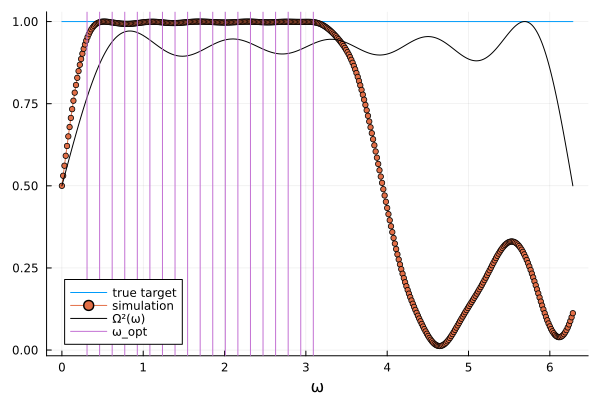

../figures/qsp-sim-opt-d10-both.pdf (false)


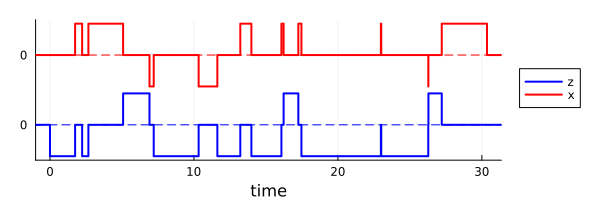

../figures/qsp-pulse-sequence-opt-d10-both.pdf (false)
../figures/qsp-sim-opt-d10-bloch-both.pdf (false)


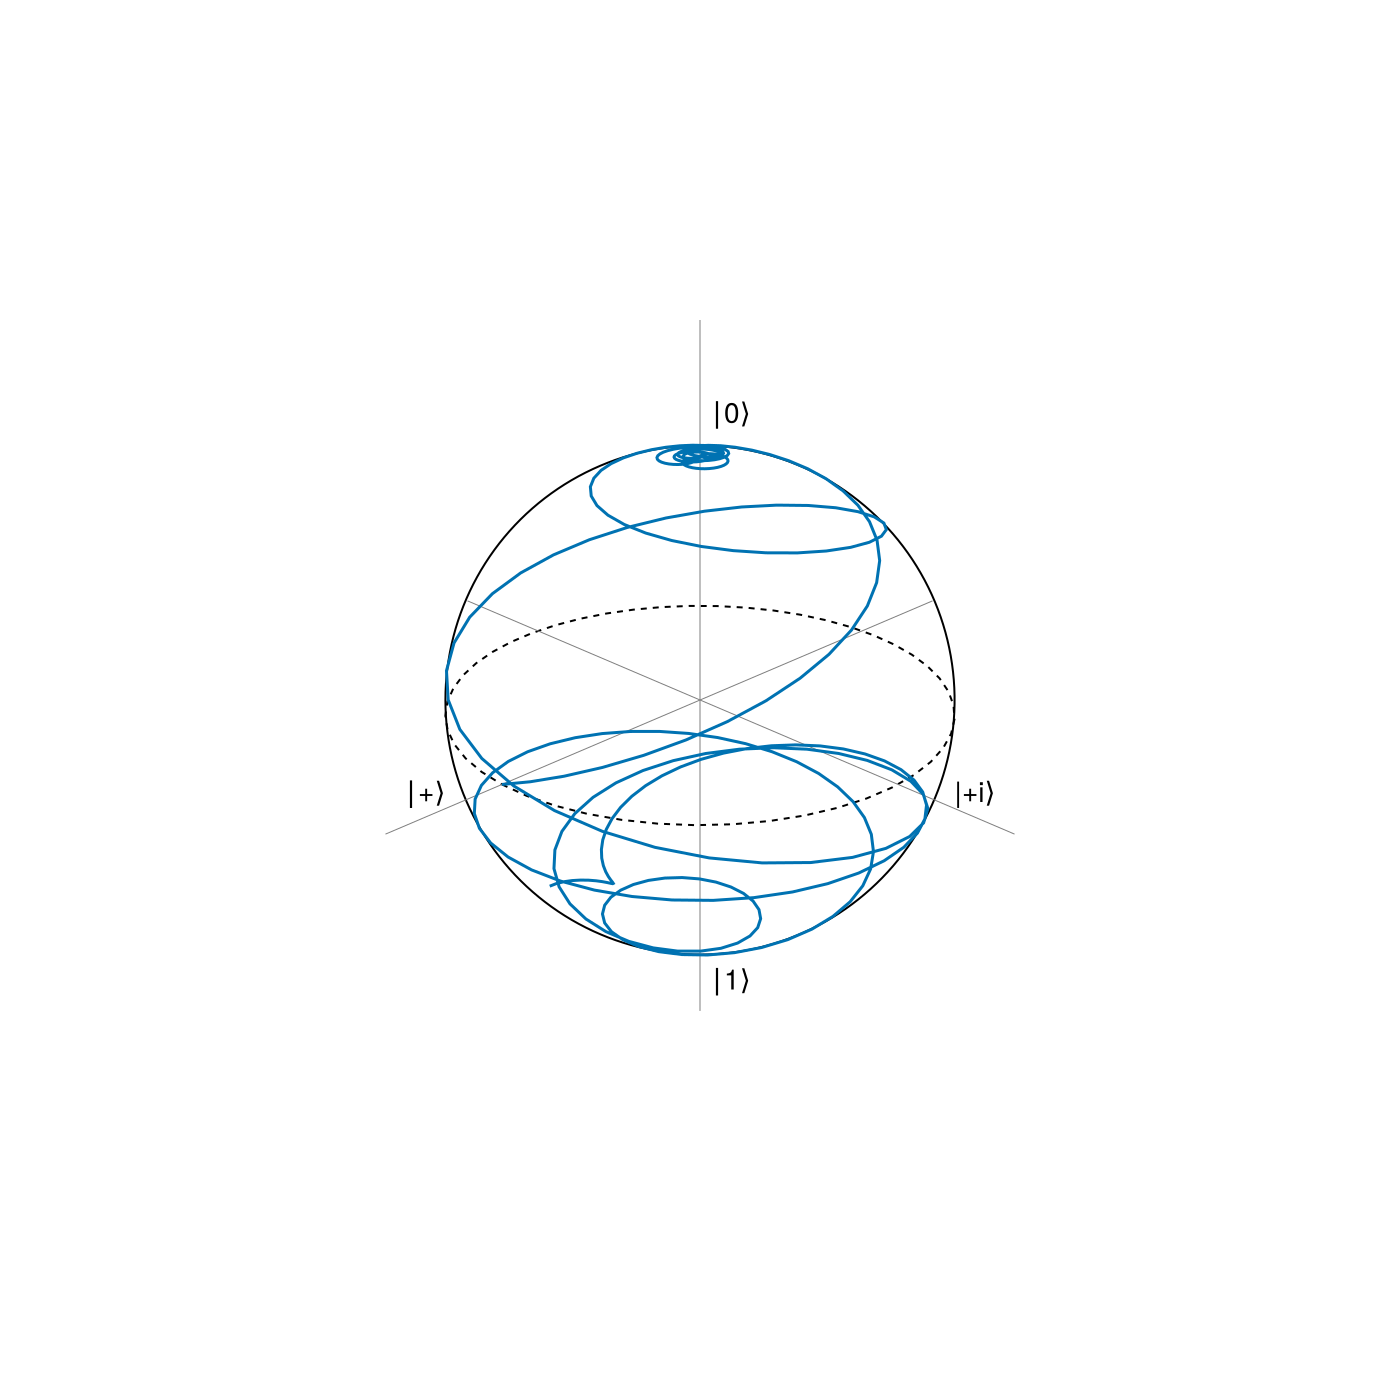

In [59]:
let
    svfig = false
    
    ωs = collect(range(0, 2PI, length=400))
    O2_v = O2(ωs, seq_new)
    #@show O2_mean = mean(O2_v)
    Plots.plot((ωs), target_func, label="true target")
    Plots.plot!((ωs), O2_v, marker=3, label="simulation")
    Plots.plot!((ωs), real(Ω².(cis.(-tz*ωs/2))), label="Ω²(ω)", lw=1, c=:black)
    Plots.vline!(ωs_opt, label="ω_opt")
    display(Plots.plot!(xlabel="ω")) 
    
    opt_change_ = replace(string(opt_change), ":" => "-")
    if svfig #|| true
        Plots.savefig("../figures/qsp-sim-opt-d$d-$opt_change_.pdf")
    end
    println("../figures/qsp-sim-opt-d$d-$opt_change_.pdf ($svfig)")
    
    
    display(visualize_pulse_sequence(seq_new)) 
    if svfig
        Plots.savefig("../figures/qsp-pulse-sequence-opt-d$d-$opt_change_.pdf")
    end
    println("../figures/qsp-pulse-sequence-opt-d$d-$opt_change_.pdf ($svfig)")
    
    
    fig, ax = setup_blochplot(outlines_only=true, show_axis=false, size=(700,700))
    s = states_by_sequence_threaded(ωs, seq_new)
    
    pBloch(ax, s, false)
    
    if svfig
        save("../figures/qsp-sim-opt-d$d-bloch-$opt_change_.pdf", fig)
        pdf2png("../figures/qsp-sim-opt-d$d-bloch-$opt_change_")
    end
    println("../figures/qsp-sim-opt-d$d-bloch-$opt_change_.pdf ($svfig)")

    
    fig
end

###### 3d

In [359]:
using BlochSphereBigFloat.Makie
function Base.show(io::IO, ::MIME"text/html", vs::VideoStream)
    mktempdir() do dir
        path = save(joinpath(dir, "video.mp4"), vs)
        # <video> only supports infinite looping, so we loop forever even when a finite number is requested
        loopoption = "" # vs.options.loop ≥ 0 ? "loop" : ""
        Base.display(
            HTML("""<video style="max-width: 100%;" autoplay controls $loopoption><source src="data:video/x-m4v;base64,""" *
            Makie.Base64.base64encode(open(read, path)) *
            """" type="video/mp4"></video>""")
        )
    end
end

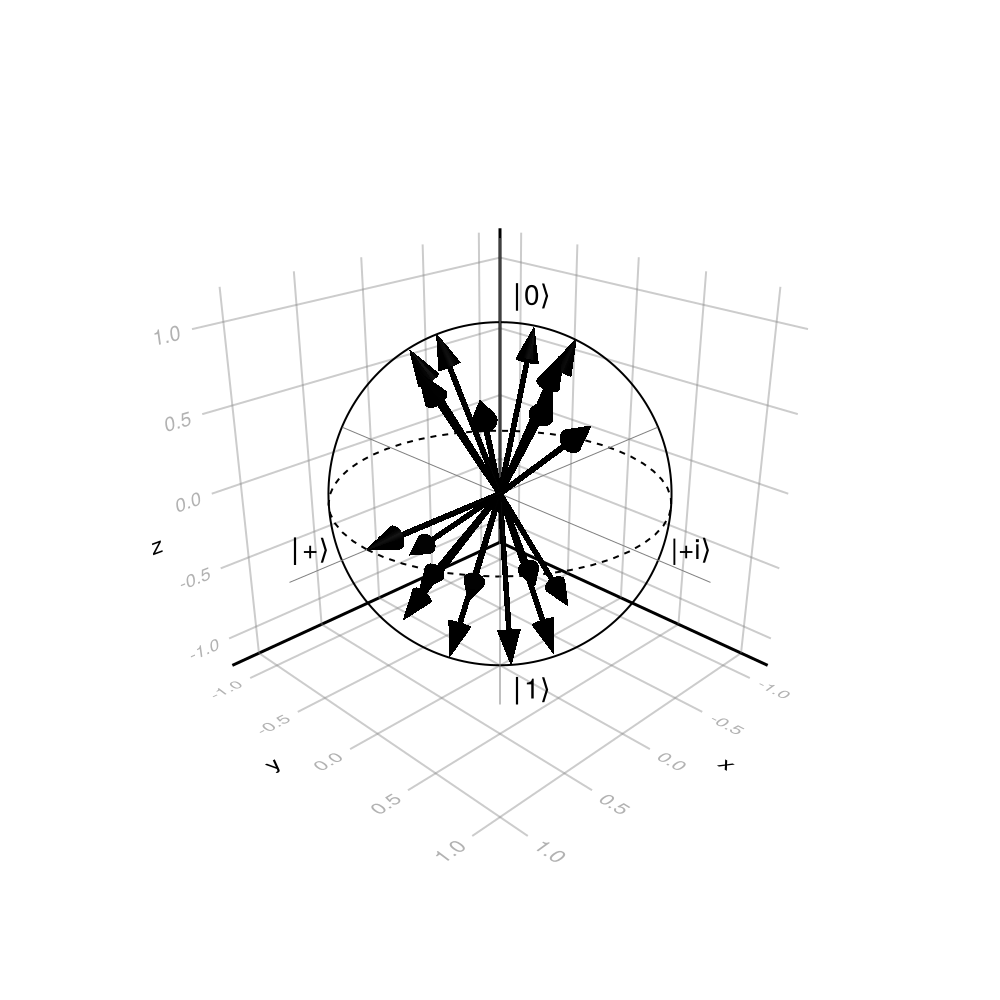

In [360]:
ωs = collect(range(-2PI, 2PI, length=20))
#seq = seq[]

#animate_sequence_path((ωs), seq, 10, outline_only=true, plot_trace=false, plot_step_trace=true, plot_arrow=true)

#fig, ax = plot_sequence_path(ωs, seq, 1)

s = states_by_sequence_threaded(ωs, seq)

fig, ax = setup_blochplot(outlines_only=true)

pBloch(ax, s, true)



fig

## Approximations vs. degree

Fitting 5/5 100%|████████████████████████████████████████| Time: 0:00:01


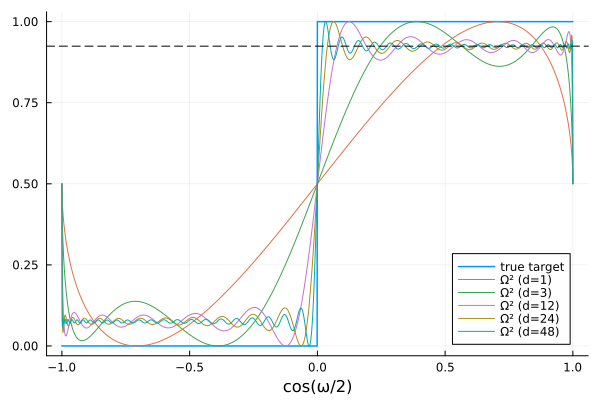

In [470]:
xs = -1:0.001:1
ys = target_func.(xs)

ds = [1,3,12,24,48] #1:64

Plots.plot(xs, target_func, label="true target", xlabel="cos(ω/2)", lw=1.5)

ms = zeros(length(ds)) 

p = Progress(sum(ds), "Fitting 0/$(length(ds))") 
j = 0

for (i,d_) in enumerate(ds)
    # random start parameters and fit
    λs = -rand(d_)
    model_(xs, ys) = model(xs, ys, d=d_)
    fit = curve_fit(model_, xs, ys, λs)
    λs = fit.param

    λs_ = vcat([[0, λ] for λ in λs]...) 
    # for rescaling-norm w/o 0.5:
    λs_ = vcat(-reverse(λs_)*im, [0.], λs_*im)
    L = LaurentPolynomial(λs_, -2d_) 
    #@show laurent_norm(L, idx=true)
    l = max(laurent_norm(L), absλ_fac)

    # rescaling
    λs = λs .* (absλ_fac/l)
    λs = vcat([[0, λ] for λ in λs]...) 
    λs = vcat(-reverse(λs)*im, [0.5], λs*im) 

    # final Laurent polynomial
    Ω² = LaurentPolynomial(λs, -2d_)
    #Plots.plot!(xs, real((L+0.5).(cis.(acos.(xs)))), label="fit (d=$d_) w/o rescaling")
    Plots.plot!(xs, real(Ω².(cis.(acos.(xs)))), label="Ω² (d=$d_)")
    
    ms[i] = mean(real(Ω².(cis.(acos.(0.1:0.001:1))))) 
    j += d_
    update!(p, j, desc="Fitting $i/$(length(ds))")
    
end
Plots.hline!([0.9243911928770372], label=false, ls=:dash, c=:black) # mean from 1:64
#@show ms
Plots.plot!()

In [472]:
#Plots.savefig("../figures/qsp-fits-step-function.pdf")

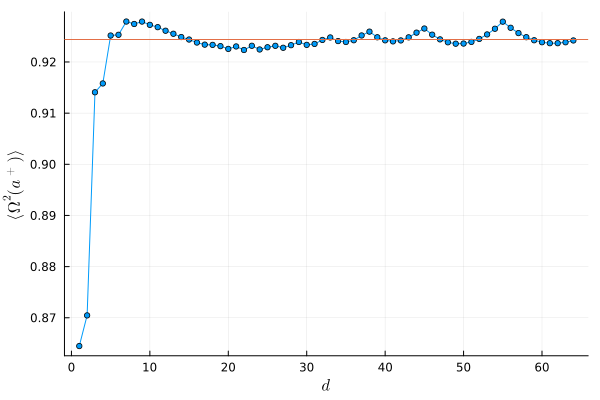

In [461]:
Plots.plot(ds, ms, m=3, legend=false, xlabel=L"d", ylabel=L"\langle\Omega^2(a^+)\rangle")
Plots.hline!([mean(ms[10:end])])

In [463]:
#Plots.savefig("../figures/qsp-fit-mean-vs-degree.pdf")

In [457]:
mean(ms[10:end])

0.9243911928770372